# Pre-requisites
- You are expected to have a **basic understanding of Python and Pandas**.  
- If you are new to Python, please review the attached **Python Review** and **Python Pandas/Numpy Review** PDFs.  
- You may also take *Python Essential Training* by Ryan Mitchell on **LinkedIn Learning**.  
  - Since Bryant has a LinkedIn Learning site license, you can access this and any other courses by signing in with your Bryant email.  
- For all hands-on demonstrations and assignments, you will have free access to a **cloud-based Jupyter Lab**.  The server will give you access to GPU capability.
  - Log into the HPC server using your Bryant email and password.  

# Data Understanding: Boston Airbnb Open Data 

This project focuses on data preparation and cleaning, the third step in the data process. Once the data is cleaned, we will use simple Python Pandas code to explore the dataset and visualize the results.

This dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/airbnb/boston).

The following Airbnb activity is included in this Boston dataset:

 - Listings, including full descriptions and average review score
 - Reviews, including unique id for each reviewer and detailed comments
 - Calendar, including listing id and the price and availability for that day
 
 For this analysis, we will Listings and reviews data.

# Import packages and airbnb listings data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#ignore warnings message
warnings.filterwarnings("ignore")

In [2]:
# read listings data

df=pd.read_csv('listings.csv')

# Review Listings data

For this project, we will mainly focus on listings data

In [3]:
# check the shape of the data. We have 3585 listings with 95 columns
df.shape

(3585, 95)

In [4]:
# check the first 5 rows of the data
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
# check the last few rows of data
df.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00
3584,14504422,https://www.airbnb.com/rooms/14504422,20160906204935,2016-09-07,(K1) Private Room near Harvard/MIT,My place is close to My home is a warm and fri...,To ensure a smooth check in: 1. You MUST have ...,My place is close to My home is a warm and fri...,none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,3,NaN


In [6]:
# check columns in the dataset
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7]:
# check total number of columns in the dataset

len(df.columns)

95

In [8]:
# select interested columns for further analysis. 
# We will focus understanding price of listings and how it is impacted by other factors such as location, review rating and etc.

selected_columns=['id', 'name', 'summary', 'street', 'neighbourhood_cleansed',
        'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
        'price', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']

df1=df[selected_columns]

In [9]:
# Since we have a lot of columns, we can display a few columns at once

#check first 10 columns of df1

df1.iloc[:,0:10].head()

# you can change the range to check other columns. Below code show the columns from 11th to 20th position

# df1.iloc[:,11:20].head()

,id,name,summary,street,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Birch Street, Boston, MA 02131, United States",Roslindale,42.282619,-71.133068,House,Entire home/apt,4
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,42.286241,-71.134374,Apartment,Private room,2
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Ardale St., Boston, MA 02131, United States",Roslindale,42.292438,-71.135765,Apartment,Private room,2
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,"Boston, MA, United States",Roslindale,42.281106,-71.121021,House,Private room,4
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Durnell Avenue, Boston, MA 02131, United States",Roslindale,42.284512,-71.136258,House,Private room,2


# Data Cleaning
- Check the data type, make sure they look correct

In [10]:
df1.dtypes

id                               int64
name                            object
summary                         object
street                          object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
square_feet                    float64
price                           object
number_of_reviews                int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [11]:
# price is object (string type). It should be float.
# by looking at the price, we noticed it has dollar sign and thousand seperator. We need to remove them so that we can covert price from object to float

df1['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [12]:
# remove $ and thousand seperator ,

df1['price_cleaned']=df1['price'].str.replace('$',"").str.replace(',',"")

# convert price from string to float

df1['price_cleaned']=df1['price_cleaned'].astype(float)

# check cleaned price
df1[['price', 'price_cleaned']].head(5)

,price,price_cleaned
0,$250.00,250.0
1,$65.00,65.0
2,$65.00,65.0
3,$75.00,75.0
4,$79.00,79.0


In [13]:
# first_review and last_review should be date and was imported as object

df1[['first_review', 'last_review']].head()

,first_review,last_review
0,NaN,NaN
1,2014-06-01,2016-08-13
2,2009-07-19,2016-08-05
3,2016-08-28,2016-08-28
4,2015-08-18,2016-09-01


In [15]:
# use to_datetime to convert first review and last reviw to date

df1['first_review']=pd.to_datetime(df1['first_review'])
df1['last_review']=pd.to_datetime(df1['last_review'])

In [16]:
# check the data type again
df1[['first_review', 'last_review']].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

# Summary statistics

In [17]:
# summarize numerial columns

df1.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_cleaned
count,3.585000e+03,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585.000000
mean,8.440875e+06,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,19.044630,2015-06-24 12:35:53.128313856,2016-06-11 11:36:19.851537664,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,173.925802
min,3.353000e+03,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009-03-21 00:00:00,2010-10-16 00:00:00,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,10.000000
25%,4.679319e+06,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,2014-12-30 00:00:00,2016-06-18 00:00:00,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,85.000000
50%,8.577620e+06,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,5.000000,2015-10-08 00:00:00,2016-08-13 00:00:00,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,150.000000
75%,1.278953e+07,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,21.000000,2016-05-19 00:00:00,2016-08-28 00:00:00,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,220.000000
max,1.493346e+07,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,404.000000,2016-09-06 00:00:00,2016-09-06 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4000.000000
std,4.500787e+06,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,35.571658,NaN,NaN,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,148.331321


In [18]:
# use transpose if you have many columns

df1.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,3585.0,8440874.627615,3353.0,4679319.0,8577620.0,12789527.0,14933461.0,4500786.860725
latitude,3585.0,42.340032,42.235942,42.329995,42.345201,42.354685,42.389982,0.024403
longitude,3585.0,-71.084818,-71.171789,-71.105083,-71.078429,-71.062155,-71.0001,0.031565
accommodates,3585.0,3.041283,1.0,2.0,2.0,4.0,16.0,1.778929
bathrooms,3571.0,1.221647,0.0,1.0,1.0,1.0,6.0,0.501487
bedrooms,3575.0,1.255944,0.0,1.0,1.0,2.0,5.0,0.75306
beds,3576.0,1.60906,0.0,1.0,1.0,2.0,16.0,1.011745
square_feet,56.0,858.464286,0.0,415.0,825.0,1200.0,2400.0,608.87431
number_of_reviews,3585.0,19.04463,0.0,1.0,5.0,21.0,404.0,35.571658
first_review,2829,2015-06-24 12:35:53.128313856,2009-03-21 00:00:00,2014-12-30 00:00:00,2015-10-08 00:00:00,2016-05-19 00:00:00,2016-09-06 00:00:00,NaN


In [19]:
# summarize categorical columns

df1.describe(include='object').transpose()

,count,unique,top,freq
name,3585,3504,Lux 2BR by Fenway w/WiFi,8
summary,3442,3113,"The unit is stylishly designed for comfort, va...",21
street,3585,1239,"Boylston Street, Boston, MA 02215, United States",64
neighbourhood_cleansed,3585,25,Jamaica Plain,343
property_type,3582,13,Apartment,2612
room_type,3585,3,Entire home/apt,2127
bed_type,3585,5,Real Bed,3453
amenities,3585,3092,{},32
price,3585,324,$150.00,144


In [20]:
# check missing values in each column
df1.isnull().sum()

id                                0
name                              0
summary                         143
street                            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     3
room_type                         0
accommodates                      0
bathrooms                        14
bedrooms                         10
beds                              9
bed_type                          0
amenities                         0
square_feet                    3529
price                             0
number_of_reviews                 0
first_review                    756
last_review                     756
review_scores_rating            813
review_scores_accuracy          823
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_communication     818
review_scores_location          822
review_scores_value             821
price_cleaned               

In [21]:
# square_feet has 3529/3585 (98%) missing value, drop it from further analysis

df2=df1.drop(columns=['square_feet'])

In [22]:
# deal with missing values.
# for summary and property_type column, replace with NA

df2['summary']=df2['summary'].fillna('NA')
df2['property_type']=df2['property_type'].fillna('NA')
df2.isnull().sum()

id                               0
name                             0
summary                          0
street                           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       14
bedrooms                        10
beds                             9
bed_type                         0
amenities                        0
price                            0
number_of_reviews                0
first_review                   756
last_review                    756
review_scores_rating           813
review_scores_accuracy         823
review_scores_cleanliness      818
review_scores_checkin          820
review_scores_communication    818
review_scores_location         822
review_scores_value            821
price_cleaned                    0
dtype: int64

In [23]:
df2.columns

Index(['id', 'name', 'summary', 'street', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price_cleaned'],
      dtype='object')

In [24]:
# deal with missing values.
# for numerical column, replace with mean

#Step 1: select all numerical columns with missing values

selectedColumns=['bathrooms', 'bedrooms','beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

# step 2: replace missing value with mean

df2[selectedColumns]=df2[selectedColumns].apply(lambda x: x.fillna(x.mean()))

df2.isnull().sum()

id                               0
name                             0
summary                          0
street                           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities                        0
price                            0
number_of_reviews                0
first_review                   756
last_review                    756
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
price_cleaned                    0
dtype: int64

## Note about dates
We will leave missing value for date (first_review and last_review) for the time being.
we generally don’t want to replace missing dates with the mean or “NA” string the same way we do with categorical or numeric data.
Dates need a different strategy depending on how you’ll use them.

In [25]:
# we can use value_counts() to find unique values in a column
# what are different type of beds available in airbnb?

df2['bed_type'].value_counts()

bed_type
Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: count, dtype: int64

## Understand shape and distribution of data

Histogram/Boxplot

<Axes: xlabel='price_cleaned', ylabel='Count'>

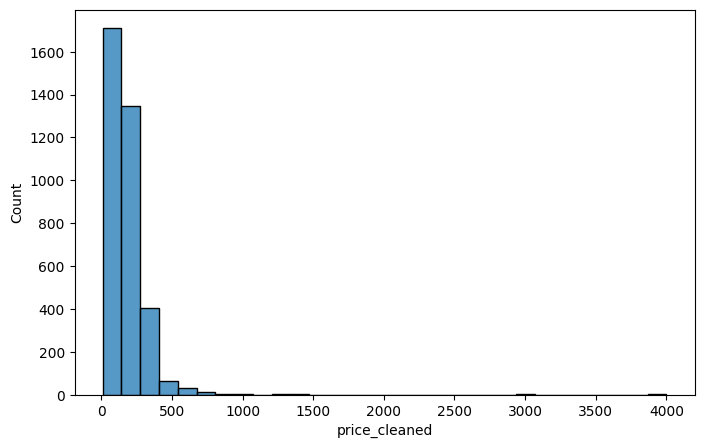

In [26]:
# check distribution of price using histogram

# set the figure size
plt.figure(figsize=(8,5))

sns.histplot(df2['price_cleaned'], bins=30, kde=False)

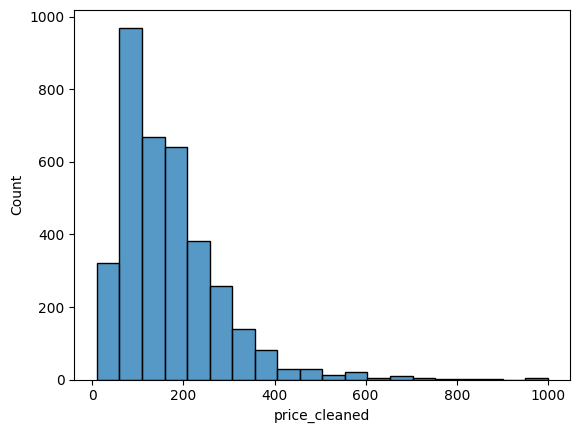

In [27]:
# limit to price below 1000, use different number of bins

df3=df2[df2.price_cleaned<=1000]

sns.histplot(df3['price_cleaned'], bins=20, kde=False)

# save figure

plt.savefig('figures/price_histogram.png')

In [28]:
# we only lose 10 listings after removing all listings with price over 1000

print(df2.shape, df3.shape)

(3585, 27) (3575, 27)


<Axes: xlabel='price_cleaned'>

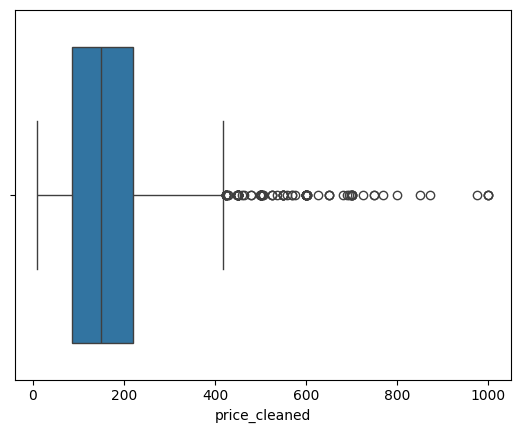

In [29]:
# boxplot

sns.boxplot(x=df3['price_cleaned'])

In [30]:
# Save the cleaned data as csv for further analysis

df3.to_csv('listings_cleaned.csv', index=False)

# Exploratory Analysis
- display top 5 neighbourhood by number of listings
- Average listing price by neighbourhood. Limit to the top 5 neighbourhood that has the highest average price
- Number of Listings by price range
- display count, mean, max, min price for all listings by neighborhood. Limit to top 5 neighbourhood based on number of listings
- Identify top 10 amenities.
- Average number of reviews by property_type and room_type. Limit to top 3 property
- Display Average Price and Review Score of Location by top 10 Neighbourhood
- whether review score rating is related to price
- number of reviews by date

In [37]:
# read cleaned listing data in

df=pd.read_csv('listings_cleaned.csv')

In [32]:
df.columns

Index(['id', 'name', 'summary', 'street', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price_cleaned'],
      dtype='object')

## display top 5 neighbourhood by number of listings

In [38]:
df['neighbourhood_cleansed'].value_counts().head(5)

neighbourhood_cleansed
Jamaica Plain    343
South End        325
Back Bay         301
Fenway           287
Dorchester       269
Name: count, dtype: int64

In [39]:
# prepare for visualization

result=df['neighbourhood_cleansed'].value_counts().head(5).reset_index()
result

,neighbourhood_cleansed,count
0,Jamaica Plain,343
1,South End,325
2,Back Bay,301
3,Fenway,287
4,Dorchester,269


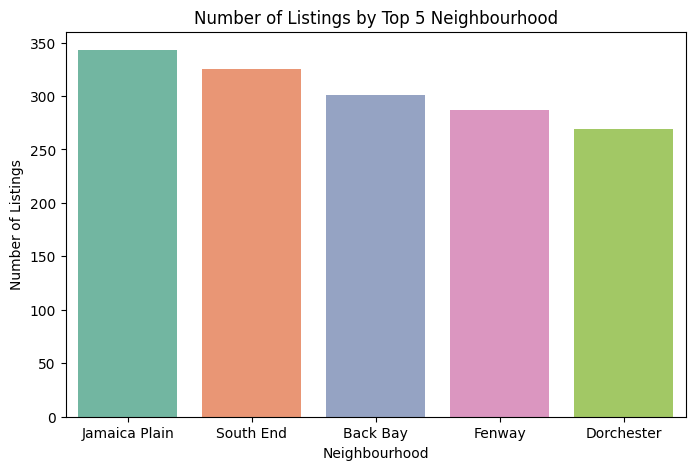

In [40]:
# visualize the result

#Create bar plot
plt.figure(figsize=(8,5))
sns.barplot(x="neighbourhood_cleansed", y="count", data=result, palette="Set2")

# Labels and title
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Top 5 Neighbourhood")
plt.show()

## Average listing price by neighbourhood. Limit to the top 5 neighbourhood that has the highest average price

In [41]:
#step 1: find the mean of price by neighbourhood
result=df.groupby('neighbourhood_cleansed')['price_cleaned'].mean().reset_index()

result.head()

# step 2: sort the list by avarage price

result1=result.sort_values(by='price_cleaned', ascending=False).head(5)

result1

# rename price_cleaned to average_price

result1.rename(columns={'neighbourhood_cleansed':'Neighbourhood', 'price_cleaned':'Average Price'}, inplace=True)

result1

,Neighbourhood,Average Price
2,Bay Village,266.833333
21,South Boston Waterfront,261.148148
13,Leather District,253.600000
1,Back Bay,237.598007
8,Downtown,236.459302


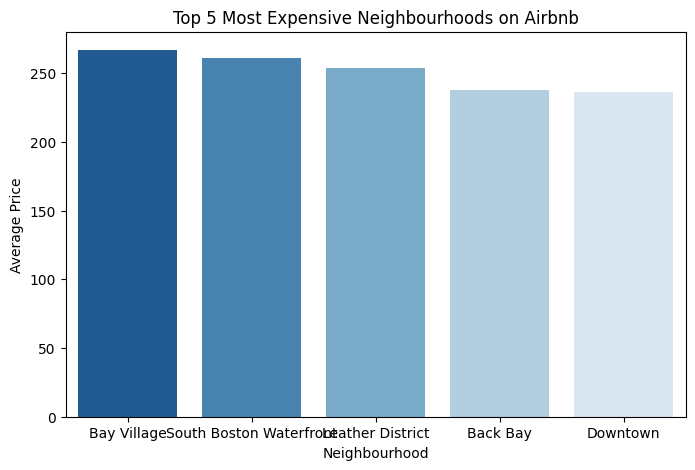

In [42]:
# Visualize the result

# Create bar plot
plt.figure(figsize=(8,5))

# use sequential color
sns.barplot(x="Neighbourhood", y="Average Price", data=result1, palette="Blues_r")

# Labels and title
plt.title("Top 5 Most Expensive Neighbourhoods on Airbnb")

plt.show()

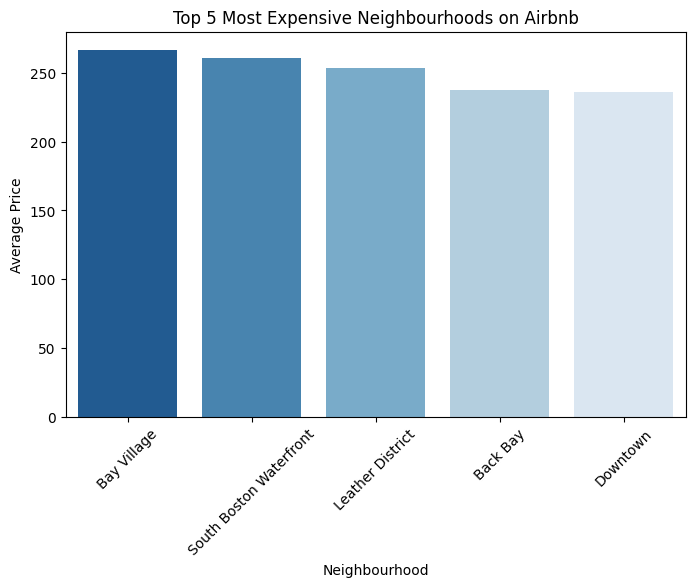

In [43]:
# Modify the above chart to rotate x label

# Create bar plot
plt.figure(figsize=(8,5))
sns.barplot(x="Neighbourhood", y="Average Price", data=result1, palette="Blues_r")

# Labels and title
plt.title("Top 5 Most Expensive Neighbourhoods on Airbnb")

# Rotate x labels
plt.xticks(rotation=45)

plt.show()

## Number of Listings by price range

In [44]:
#Classify price into different range. Create 4 bins for price

df['price_level']=pd.cut(df['price_cleaned'], bins=4)

df['price_level'].value_counts()

price_level
(9.01, 257.5]      2980
(257.5, 505.0]      539
(505.0, 752.5]       48
(752.5, 1000.0]       8
Name: count, dtype: int64

In [45]:
# we can define our own value range for the price

df['price_level']=pd.cut(df['price_cleaned'], bins=[0, 100, 200, 300, 400, 500, 1000])
df['price_level'].value_counts()

price_level
(100, 200]     1337
(0, 100]       1252
(200, 300]      648
(300, 400]      222
(400, 500]       60
(500, 1000]      56
Name: count, dtype: int64

In [46]:
# visualize the result

result=df['price_level'].value_counts().reset_index()

result

,price_level,count
0,"(100, 200]",1337
1,"(0, 100]",1252
2,"(200, 300]",648
3,"(300, 400]",222
4,"(400, 500]",60
5,"(500, 1000]",56


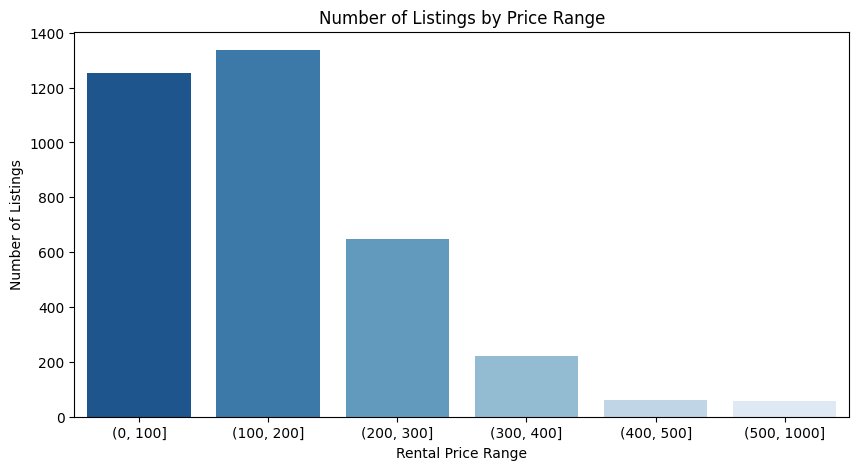

In [47]:
# set the figure size
plt.figure(figsize=(10,5))

sns.barplot(x="price_level", y="count", data=result, palette="Blues_r")

# Labels and title
plt.xlabel("Rental Price Range")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Price Range")
plt.show()

## display count, mean, max, min price for all listings by neighborhood. Limit to top 5 neighbourhood based on number of listings

In [48]:
# identify top 5 listing based on count (number of listings)

top5=df['neighbourhood_cleansed'].value_counts().nlargest(5).index

top5

result=df[df['neighbourhood_cleansed'].isin(top5)].groupby('neighbourhood_cleansed')['price_cleaned'].agg(['count','mean', 'min', 'max'])

result

,count,mean,min,max
neighbourhood_cleansed,,,,
Back Bay,301,237.598007,40.0,975.0
Dorchester,269,91.639405,25.0,395.0
Fenway,287,199.536585,30.0,750.0
Jamaica Plain,343,138.478134,22.0,750.0
South End,325,200.978462,45.0,800.0


In [49]:
# sort the value by average price

result.sort_values(by=['mean'], ascending=False, inplace=True)

result

,count,mean,min,max
neighbourhood_cleansed,,,,
Back Bay,301,237.598007,40.0,975.0
South End,325,200.978462,45.0,800.0
Fenway,287,199.536585,30.0,750.0
Jamaica Plain,343,138.478134,22.0,750.0
Dorchester,269,91.639405,25.0,395.0


In [50]:
# visualize mean, min and max price by neighbourhood

# step 1 drop count

result1=result.drop(columns=['count']).reset_index()

result1

# use melt function to transform a wide-format DataFrame into a long-format DataFrame (also called “unpivoting”).
result2=result1.melt(id_vars=['neighbourhood_cleansed'], # columns to keep fixed
                     value_vars=['mean', 'min', 'max'], # columns to unpivot
                     var_name='price_stats',    # Name for the new column that will hold the former column names
                     value_name='price')  # Name for the new column that will hold the values.
result2

,neighbourhood_cleansed,price_stats,price
0,Back Bay,mean,237.598007
1,South End,mean,200.978462
2,Fenway,mean,199.536585
3,Jamaica Plain,mean,138.478134
4,Dorchester,mean,91.639405
5,Back Bay,min,40.000000
6,South End,min,45.000000
7,Fenway,min,30.000000
8,Jamaica Plain,min,22.000000
9,Dorchester,min,25.000000


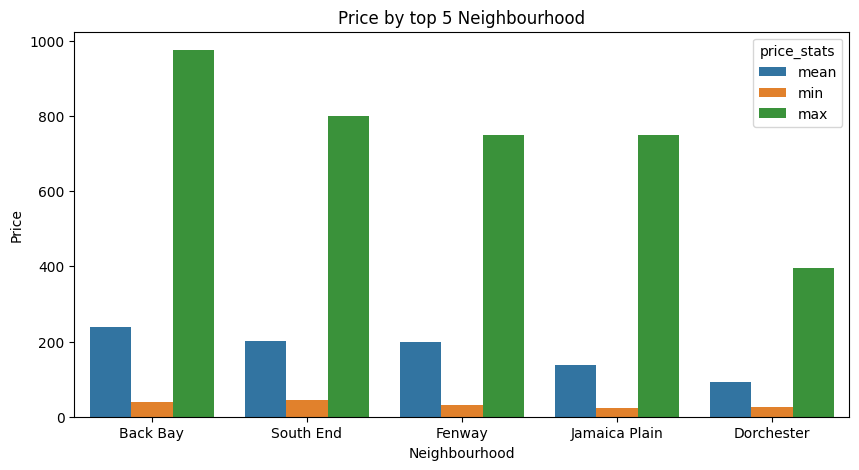

In [51]:
# set the figure size
plt.figure(figsize=(10,5))

sns.barplot(x="neighbourhood_cleansed", y="price", data=result2, hue='price_stats')

# Labels and title
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.title("Price by top 5 Neighbourhood")
plt.show()

## Identify top 10 amenities.

In [47]:
df['amenities']

0       {TV,"Wireless Internet",Kitchen,"Free Parking ...
1       {TV,Internet,"Wireless Internet","Air Conditio...
2       {TV,"Cable TV","Wireless Internet","Air Condit...
3       {TV,Internet,"Wireless Internet","Air Conditio...
4       {Internet,"Wireless Internet","Air Conditionin...
                              ...                        
3570    {Internet,"Wireless Internet","Air Conditionin...
3571    {TV,Internet,"Wireless Internet","Air Conditio...
3572    {"translation missing: en.hosting_amenity_49",...
3573    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
3574    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3575, dtype: object

In [52]:
# increase width of pandas column to see the full content of amenities

pd.set_option('display.max_colwidth', 200)

df['amenities']

0       {TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"L...
1       {TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector...
2       {TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",Essentials,S...
3       {TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,Breakfast,"Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid ...
4                          {Internet,"Wireless Internet","Air Conditioning",Kitchen,Breakfast,Heating,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit",Essent

In [53]:
# split amenities by comma

df['amenities1']=df['amenities'].str.split(",")

df['amenities1'].head()

# explode each amentity into one row
#  ignore_index resets the index of the exploded result to a continuous 0, 1, 2, … sequence.
df['amenities2']=df['amenities1'].explode(ignore_index=True)

df['amenities2'].head(10)

0                             {TV
1             "Wireless Internet"
2                         Kitchen
3      "Free Parking on Premises"
4    "Pets live on this property"
5                          Dog(s)
6                         Heating
7           "Family/Kid Friendly"
8                          Washer
9                           Dryer
Name: amenities2, dtype: object

In [54]:
# show top 10 amenities

df['amenities2'].value_counts().head(10)

amenities2
Heating                       211
Kitchen                       194
"Smoke Detector"              193
"Wireless Internet"           179
Essentials                    171
"Carbon Monoxide Detector"    171
Washer                        163
Dryer                         157
"Air Conditioning"            145
{TV                           135
Name: count, dtype: int64

In [55]:
# need to clean amentities. Remove special character

df['amenities3']=df['amenities2'].str.replace("{|}|\"", "", regex=True)

df['amenities3'].value_counts().head(10)

amenities3
Wireless Internet           217
Heating                     212
Kitchen                     194
Smoke Detector              194
Essentials                  186
Carbon Monoxide Detector    171
Washer                      163
Dryer                       162
Internet                    156
Air Conditioning            145
Name: count, dtype: int64

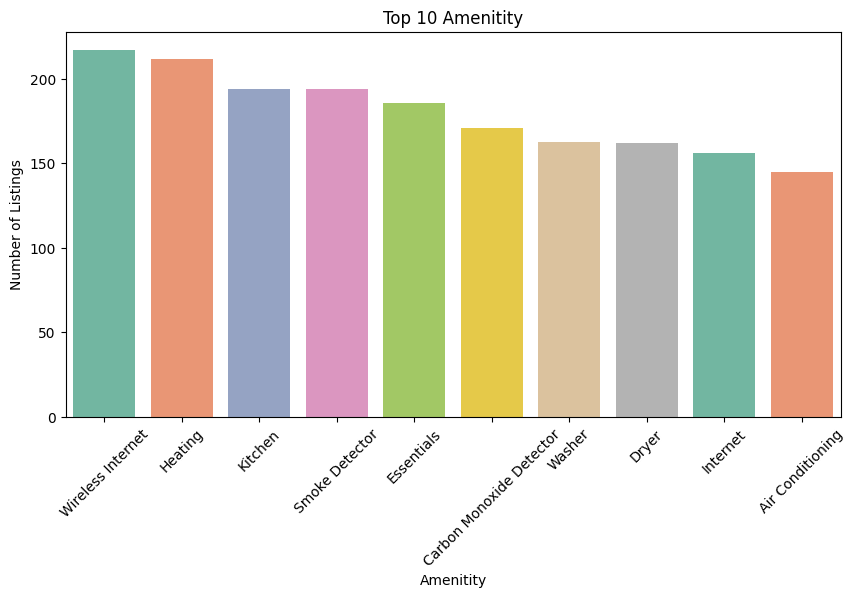

In [56]:
# visualize the result

result=df['amenities3'].value_counts().head(10).reset_index()

result

# set the figure size
plt.figure(figsize=(10,5))

sns.barplot(x="amenities3", y="count", data=result, palette="Set2")

# Labels and title
plt.xlabel("Amenitity")
plt.ylabel("Number of Listings")
plt.title("Top 10 Amenitity")

# Rotate x labels
plt.xticks(rotation=45)

plt.show()

## Average number of reviews by property type and room type. Limit to top 3 property based on numbe of listings

In [57]:
top3=df['property_type'].value_counts().nlargest(3).index

top3

df[df['property_type'].isin(top3)].groupby(['property_type', 'room_type'])['number_of_reviews'].mean()

property_type  room_type      
Apartment      Entire home/apt    17.030717
               Private room       17.757344
               Shared room        11.419355
Condominium    Entire home/apt    11.480000
               Private room       19.848101
               Shared room        24.500000
House          Entire home/apt    21.163265
               Private room       34.133333
               Shared room         6.666667
Name: number_of_reviews, dtype: float64

In [58]:
# store ther result in a dataframe for visualization

result=df[df['property_type'].isin(top3)].groupby(['property_type', 'room_type'])['number_of_reviews'].mean().reset_index()

result

,property_type,room_type,number_of_reviews
0,Apartment,Entire home/apt,17.030717
1,Apartment,Private room,17.757344
2,Apartment,Shared room,11.419355
3,Condominium,Entire home/apt,11.480000
4,Condominium,Private room,19.848101
5,Condominium,Shared room,24.500000
6,House,Entire home/apt,21.163265
7,House,Private room,34.133333
8,House,Shared room,6.666667


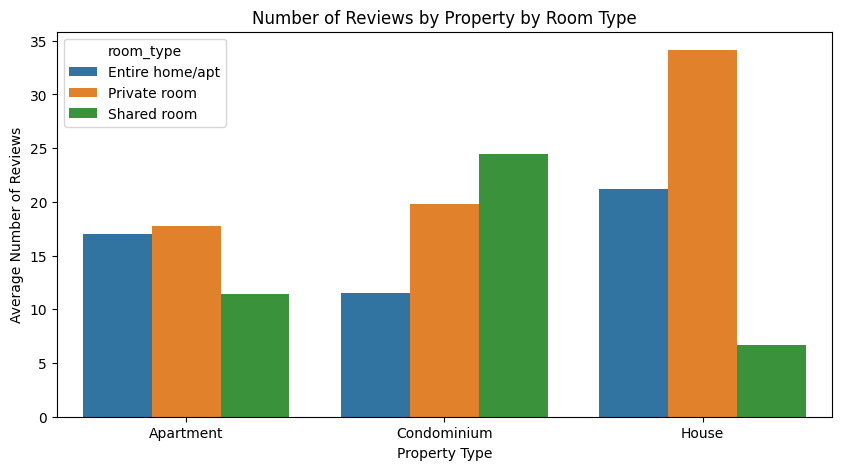

In [59]:
# visualize the result

# set the figure size
plt.figure(figsize=(10,5))

sns.barplot(x="property_type", y="number_of_reviews", data=result, hue='room_type')

# Labels and title
plt.xlabel("Property Type")
plt.ylabel("Average Number of Reviews")
plt.title("Number of Reviews by Property by Room Type")
plt.show()

## Display Average Price and Review Score of Location by top 10 Neighbourhood

In [60]:
top10=df.groupby('neighbourhood_cleansed')['review_scores_location'].mean().nlargest(10).index

result = (
    df[df.neighbourhood_cleansed.isin(top10)]
    .groupby('neighbourhood_cleansed')[['price_cleaned', 'review_scores_location']]
    .mean()
    .sort_values(by=['price_cleaned'], ascending=False)
)

result.head(10)

,price_cleaned,review_scores_location
neighbourhood_cleansed,,
Bay Village,266.833333,9.763014
South Boston Waterfront,261.148148,9.611395
Back Bay,237.598007,9.831651
Downtown,236.459302,9.606734
Beacon Hill,213.343750,9.869464
West End,209.591837,9.553244
South End,200.978462,9.664660
Fenway,199.536585,9.554817
North End,195.678322,9.856804


Text(0, 0.5, 'Average Location Review Scores')

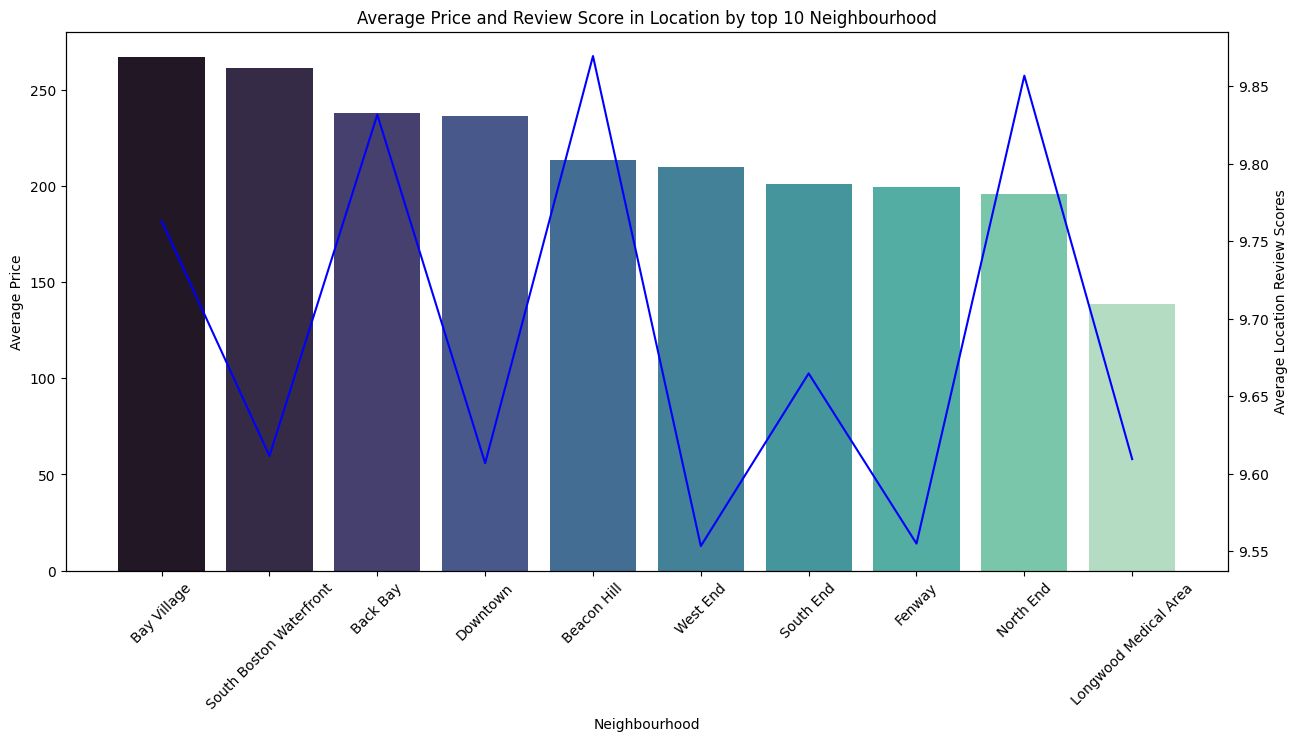

In [61]:
# visualize the result

# Set the figure size

plt.figure(figsize=(15, 7))

# use a sequential color with 10 variations

my_palette=sns.color_palette("mako", 10)

# create a bar chart using seaborn

ax=sns.barplot(x=result.index, y="price_cleaned", data=result, palette=my_palette)

# create a line chart using seaborn and Matplotlib

ax2=ax.twinx()

ax2.plot(result.index, result["review_scores_location"], color="blue")

# set the chart title and labels
ax.set_title("Average Price and Review Score in Location by top 10 Neighbourhood")
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Average Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax2.set_ylabel("Average Location Review Scores")

## Check whether review score rating is related to price

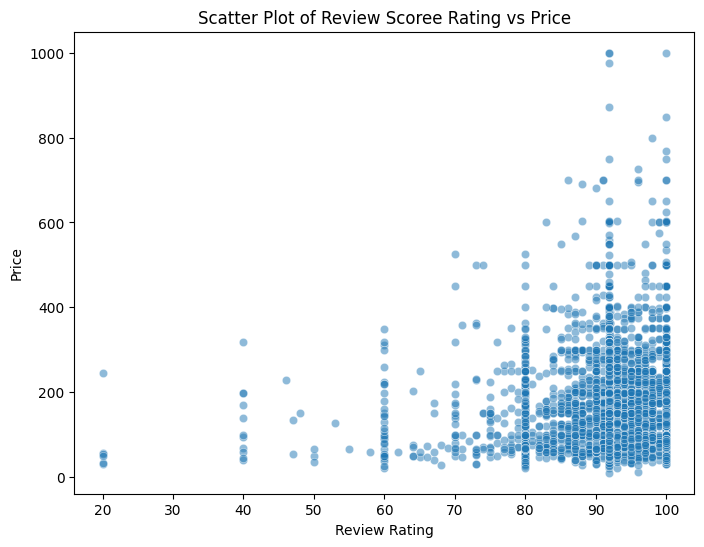

In [62]:
# create a scatter plot between airbnb review scores and price

plt.figure(figsize=(8,6))
sns.scatterplot(x="review_scores_rating", y="price_cleaned", data=df, alpha=0.5)

plt.xlabel("Review Rating")
plt.ylabel("Price")
plt.title("Scatter Plot of Review Scoree Rating vs Price")
plt.show()

## Number of Reviews by Date

In [64]:
reviews=pd.read_csv('reviews.csv')

reviews.shape

(68275, 6)

In [46]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it ..."
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. From the outside the house didn't look so inviting but the inside was very nice! Even though Islam himself was not there everything was prepared for our...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the commodities. Very close to the airport metro station and located in quite safe area. Islam responds very quickly and is very helpful. I would recommend ...
4,1178162,5171140,2013-06-16,6848427,Andrew,"Great location. Just 5 mins walk from the Airport Station. Good food nearby.\r\nRoom was simple, clean, just what I was after."


In [65]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [66]:
# convert data from object to date

reviews['date']=pd.to_datetime(reviews.date)

reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

Text(0.5, 1.0, 'Number of Reviews by Date')

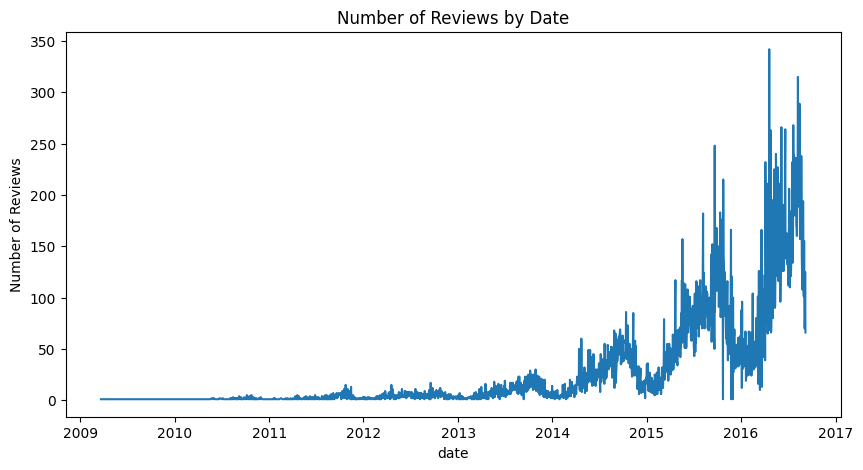

In [67]:
# number of reviews by date

result=reviews.groupby('date')['listing_id'].count().reset_index().rename(columns={'listing_id': 'Number of Reviews'})

#set figure size

plt.figure(figsize=(10,5))

sns.lineplot(x="date", y="Number of Reviews", data=result)

plt.title("Number of Reviews by Date")

Text(0.5, 1.0, 'Number of Reviews by Date')

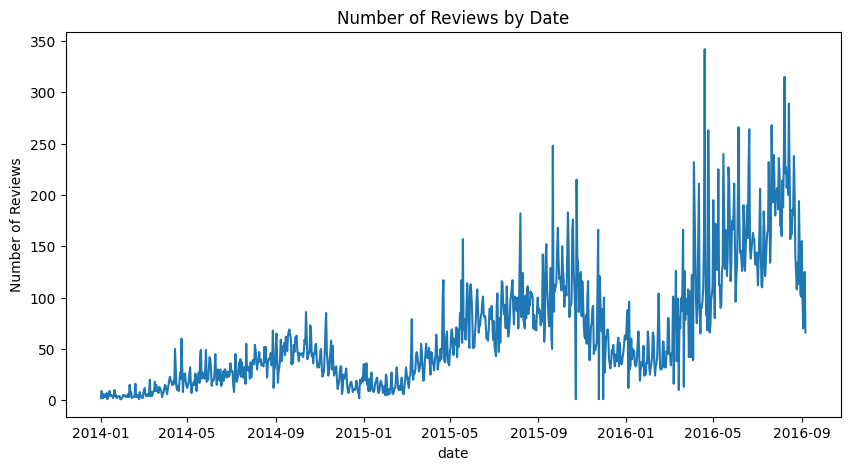

In [68]:
# limit to date after 2014

result1=result[result['date'].dt.year>=2014]

#set figure size

plt.figure(figsize=(10,5))

sns.lineplot(x="date", y="Number of Reviews", data=result1)

plt.title("Number of Reviews by Date")

#  Data joining
join listing and review data

listing_id in review table is linked to id in the listings table

In [69]:
## drop id from reviews table

reviews1=reviews.drop(['id'], axis=1)

# read cleaned listings data

df=pd.read_csv('airbnb_boston/listings_cleaned.csv')

# join listing and review data

df1=df.merge(reviews1, left_on='id', right_on='listing_id', how='inner')

df1.columns

Index(['id', 'name', 'summary', 'street', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price_cleaned', 'listing_id', 'date',
       'reviewer_id', 'reviewer_name', 'comments'],
      dtype='object')